# **Grafica del movimiento Parabolico**


Dados un angulo $\theta$ y una rapidez inicial $v_o$, se puede calcular el tiempo total de vuelo de un movimiento parabolico.

Sabemos que las ecuaciones de movimiento en "$x$" y "$y$", se describen como:

*   $x(t) = x_o + v_o cos(\theta) t$

*   $y(t) = y_o + v_o sin(\theta) t - \frac{1}{2} g t²$


Asumimos que $y_o = 0$, con esto, podemos encontrar el tiempo total de la trayectoria asumiendo $y(t) = 0$. Nos queda:

*   $t_f = \frac{2 v_o sin(\theta)}{g}$

Con esto y las condiciones iniciales, podemos determinar toda la trayectoria del movimiento parabolico.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

rad = np.pi/180

In [2]:
# Ecuaciones de movimiento

# Tiempo de vuelo

def tiempo_vuelo(v_0,theta):

   return (2*v_0*np.sin(theta*rad))/9.81

# Posición en "X"

def posicion_x(x_0,v_0,theta,t):

  return x_0 + v_0*np.cos(theta*rad)*t

# Posición en "Y"

def posicion_y(v_0,theta,t):

  return v_0*np.sin(theta*rad)*t - 0.5*9.81*(t**2)


In [3]:
v_inicial = 0
theta = 0


dicc = {"v_inicial":v_inicial, "tetha":theta}


In [4]:
import json

with open("condiciones_iniciales.json", "w") as archivo:
    json.dump(dicc, archivo, indent=4)

In [15]:
with open("condiciones_iniciales.json", "r") as archivo:
  d = json.load(archivo)

d

{'v_inicial': 10, 'tetha': 30}

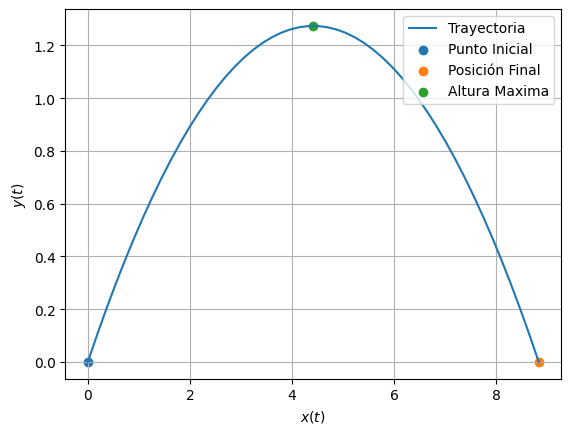

In [16]:
# Grafico de trayectoria

v_inicial = d["v_inicial"]
theta = d["tetha"]

t_total = tiempo_vuelo(v_inicial,theta)

t_posicion = np.linspace(0,t_total)
t_velocidad = np.linspace(0,t_total,25)



x1 = posicion_x(0,v_inicial,theta,t_posicion)
y1 = posicion_y(v_inicial,theta,t_posicion)

plt.plot(x1,y1, label = "Trayectoria")
plt.xlabel("$x(t)$")
plt.ylabel("$y(t)$")
plt.scatter(0,0, label = "Punto Inicial")
plt.scatter(posicion_x(0,v_inicial,theta,t_total),posicion_y(v_inicial,theta,t_total), label = "Posición Final")
plt.scatter(posicion_x(0,v_inicial,theta,t_total/2),posicion_y(v_inicial,theta,t_total/2), label = "Altura Maxima")
plt.legend(loc="upper right")
plt.grid()
plt.show()